In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

model = keras.models.load_model("model.h5")

2022-03-28 17:00:30.997718: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
image_size = (48,48)
batch_size = 32

trainingSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/Training",  
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

validationSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/PrivateTest", 
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

testSet = tf.keras.preprocessing.image_dataset_from_directory(
    "fer_images/PublicTest", 
    seed = 1337, 
    image_size = image_size, 
    batch_size = batch_size,
)

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


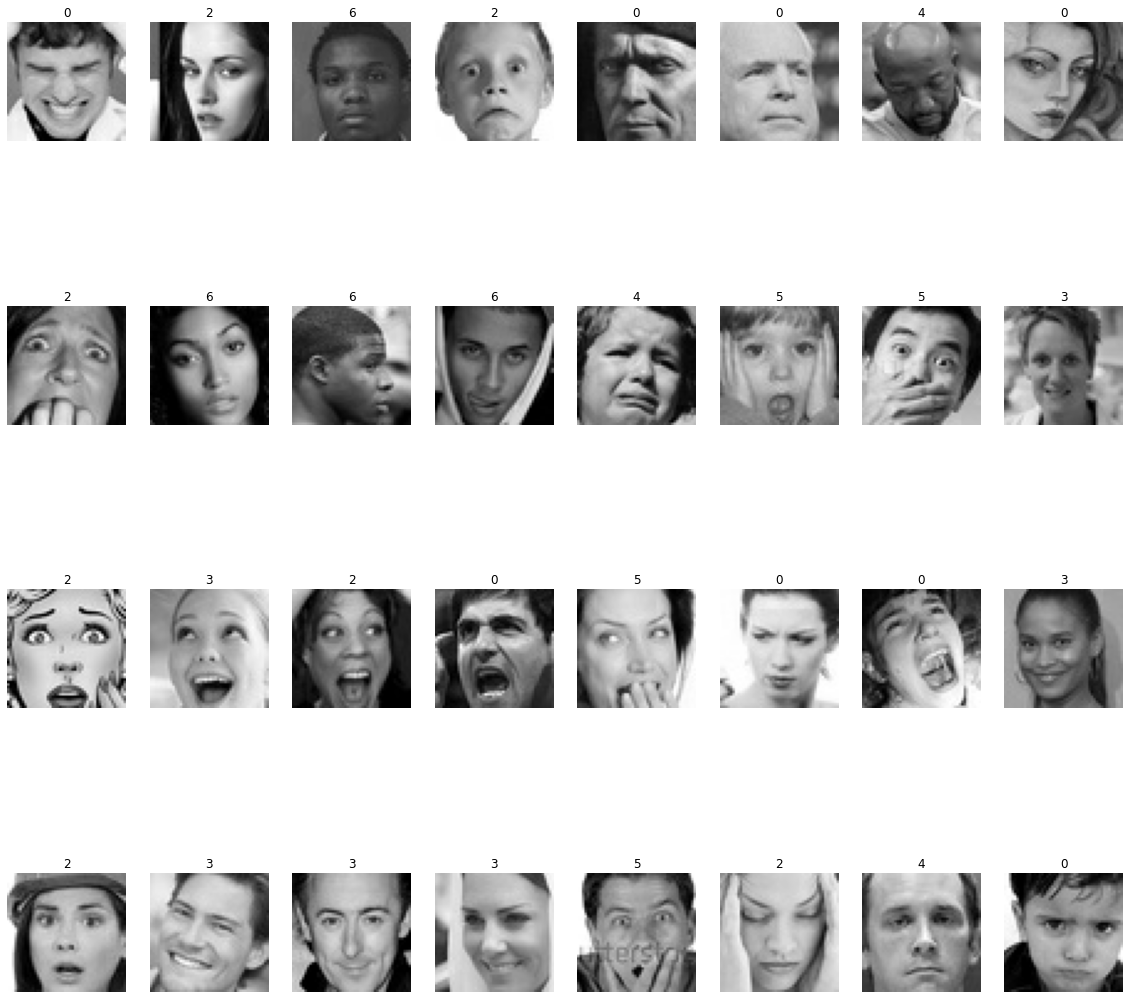

In [73]:
plt.figure(figsize=(20, 20))
for images, labels in testSet.take(1):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [ ]:

result = np.zeros((7,7))
plt.figure()
for im, label in testSet:
    for i in range(len(label)):
        img = img_to_array(im[i])
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        pred = model.predict(img)
        predicted = np.argmax(pred)
        result[int(label[i])][predicted] += 1

In [80]:
#Normalize Results
temp = result

for i in range(temp.shape[0]):
    total = 0
    for j in range(temp.shape[1]):
        total = total + temp[i][j]
temp = temp.T

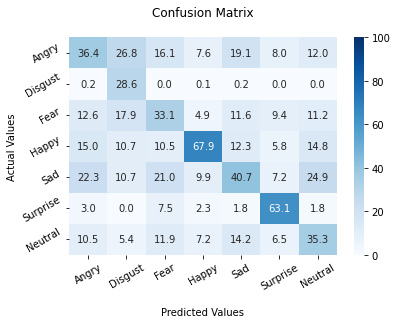

In [81]:
import seaborn as sns

ax = sns.heatmap(temp, annot=True, cmap='Blues', fmt='.1f', vmin=0, vmax=100)

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], rotation=30)
ax.yaxis.set_ticklabels(['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], rotation=30)

## Display the visualization of the Confusion Matrix.
plt.show()